In [1]:
import numpy as np
from time import time
from torch import optim
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import KFold
import torch
import dataset, models
from tqdm import tqdm
from PIL import Image
import cv2
from matplotlib import pyplot as plt

2023-07-06 20:54:31.351089: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:7704] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-07-06 20:54:31.351152: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-07-06 20:54:31.351171: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1520] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-06 20:54:31.575994: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 20:54:33.513577: W tensorflow/compiler/

EDOF_CNN_max:  3410083
EDOF_CNN_3D:  2864035
EDOF_CNN_fast:  526819
EDOF_CNN_pairwise:  600931


In [2]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

2023-07-06 20:54:37.809614: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-06 20:54:37.818476: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-06 20:54:37.818827: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
# pth_path = 'dataset-fraunhofer_elastic_only-image_size-512-method-EDOF_CNN_RGB-Z-5-fold-0-epochs-100-batchsize-1-lr-0.001-cudan-0-image_channels-rgb-automate-1-augmentation-0.pth'
# model = models.EDOF_CNN_RGB()
# model.load_state_dict(torch.load(pth_path))



In [4]:
img_path = r"/home/van/research/EDoF_FhP/aligned/Focus_smear01/x3_y21/4968.jpg"
image = cv2.imread(img_path)
image = np.array(image)

In [5]:
image.shape

(531, 531, 3)

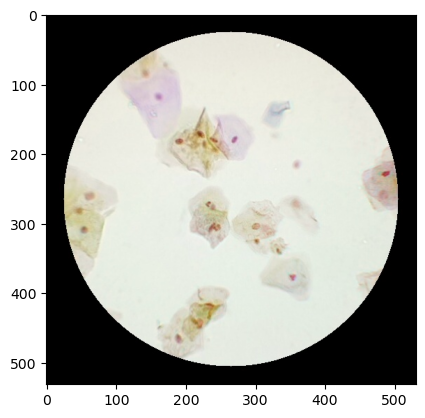

In [6]:
plt.imshow(image)

In [29]:
tensor = torch.from_numpy(image)
tensor.shape

torch.Size([531, 531, 3])

In [30]:
train_transform = dataset.aug_transforms
train_transformY = dataset.aug_transforms
common_transform = dataset.common_transform_hflip

tr_ds = dataset.Dataset('train',train_transform, 'fraunhofer_raw', 5, 0, train_transformY,common_transform)
tr = DataLoader(tr_ds, 1, True,  pin_memory=True)

In [31]:
ds0 = tr_ds[0]

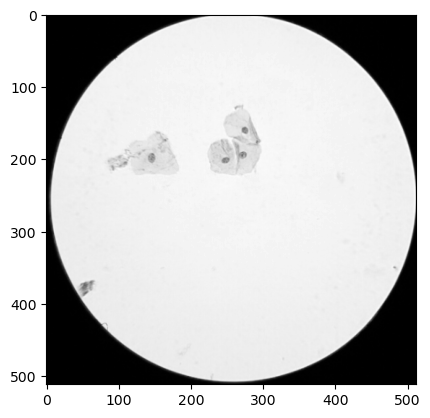

In [32]:
plt.imshow(ds0[0][0].permute(1, 2, 0),cmap='gray')

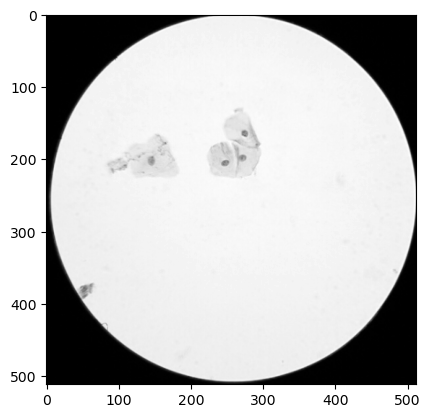

In [33]:
plt.imshow(ds0[0][1].permute(1, 2, 0),cmap='gray')

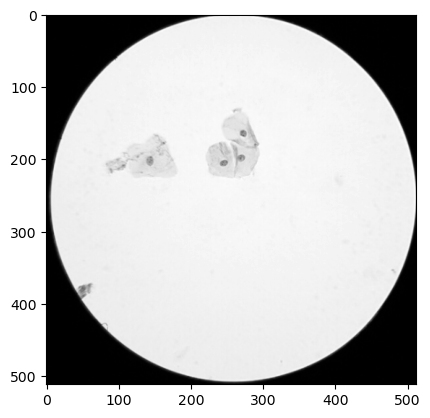

In [34]:
plt.imshow(ds0[0][2].permute(1, 2, 0),cmap='gray')

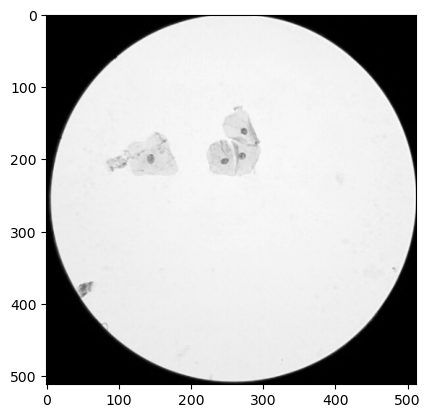

In [35]:
plt.imshow(ds0[0][3].permute(1, 2, 0),cmap='gray')

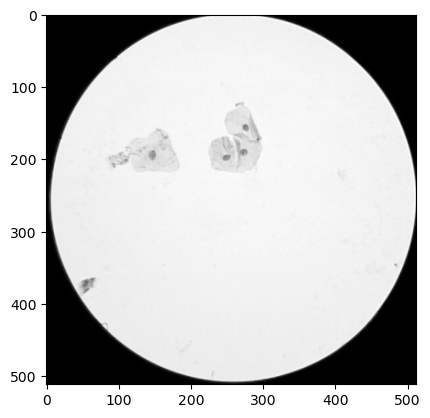

In [36]:
plt.imshow(ds0[0][4].permute(1, 2, 0),cmap='gray')

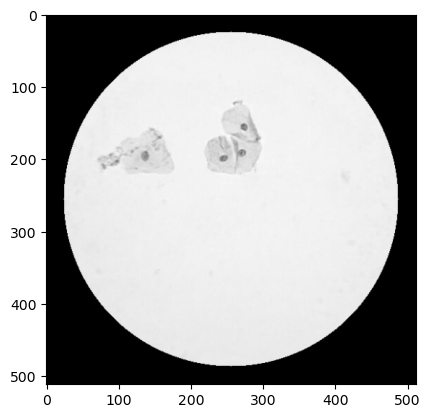

In [37]:
plt.imshow(ds0[1].permute(1, 2, 0),cmap='gray') 

In [38]:
torch.rand(1).numpy()[0]

0.010191143

In [39]:
import elasticdeform

test_im = ds0[0][0].permute(1, 2, 0).numpy()
X_deformed = elasticdeform.deform_random_grid(test_im, sigma=10, points=3, axis=(0,1))

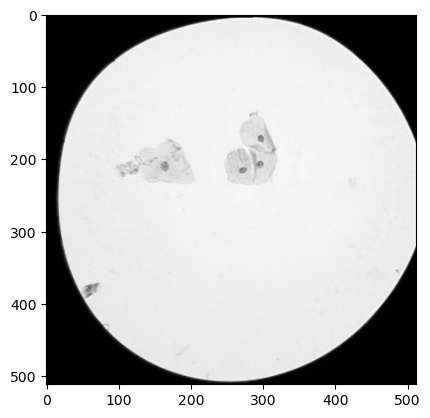

In [40]:
plt.imshow(X_deformed,cmap='gray')

In [41]:
target_image = ds0[1].permute(1, 2, 0).numpy()

In [42]:
target_indices = np.nonzero(target_image)
target_indices

(array([ 15,  15,  15, ..., 495, 495, 495]),
 array([249, 250, 251, ..., 245, 246, 247]),
 array([0, 0, 0, ..., 0, 0, 0]))

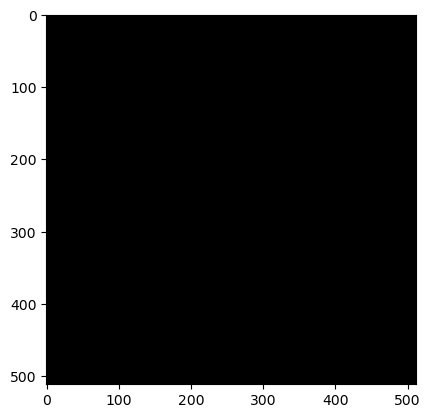

In [43]:
black = np.zeros((512,512,1))
plt.imshow(black,cmap='gray')

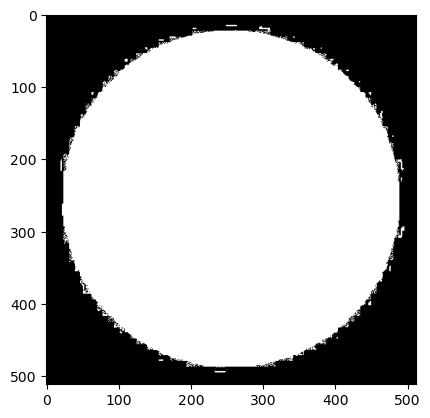

In [44]:
black[np.nonzero(target_image)] = 255
plt.imshow(black,cmap='gray')

In [45]:
xx, yy = np.mgrid[:200, :200]
circle = (xx - 100) ** 2 + (yy - 100) ** 2

In [46]:
from skimage.draw import disk
mask = np.zeros((512, 512), dtype=np.uint8)
row = 256
col = 256
radius = 235
# modern scikit uses a tuple for center
rr, cc = disk((row, col), radius)
mask[rr, cc] = 1

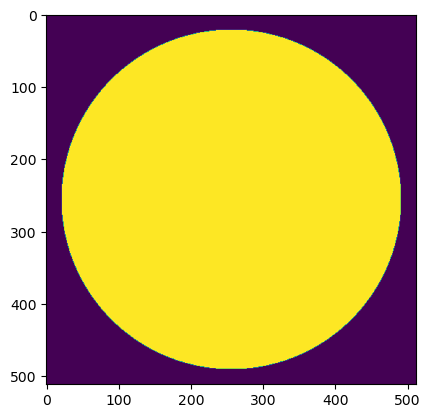

In [47]:
plt.imshow(mask)

In [48]:
test_im[rr,cc] = X_deformed[rr,cc]

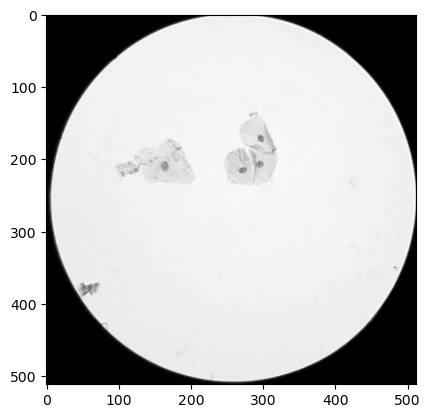

In [49]:
plt.imshow(test_im,cmap='gray')

In [50]:
mm = [1,2,3,4]
mm[:-1]

[1, 2, 3]